In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_classif
from sklearn.neural_network import MLPClassifier, MLPRegressor

# PART A - CLASSIFICATION TASK

Objective: To identify if a person is drinker (Yes or No) or Smoker: Never smoked(1), Used to smoke(2), Still smoking(3)

1. Exploratory Data Analysis and Data Understanding

In [11]:
#Loading Dataset
df_raw = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/Final Assessment/Task 1/smoking_driking_dataset_Ver01.csv')
print("Shape : " , df_raw.shape)
print("\nColumns : \n", df_raw.columns.tolist())
print("\nData Types : \n", df_raw.dtypes)
display(df_raw.head(10))
display(df_raw.info())
display(df_raw.describe())
display(df_raw['DRK_YN'].value_counts(dropna=False))
display((df_raw['DRK_YN'].value_counts(normalize=True) * 100).round(2))

Shape :  (991346, 24)

Columns : 
 ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN']

Data Types : 
 sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

None

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


,count
DRK_YN,
N,495858
Y,495488


,proportion
DRK_YN,
N,50.02
Y,49.98


In [12]:
#Encoding categorical values
df_raw['sex'] = df_raw['sex'].map({'Male': 1, 'Female': 0})

df_raw['DRK_YN'] = df_raw['DRK_YN'].map({'Y': 1, 'N' : 0})

#Converting column SMK_stat_type_cd to integer (was float)
df_raw['SMK_stat_type_cd'] = df_raw['SMK_stat_type_cd'].astype(int)

#Checking and droping duplicate rows
print("Initial duplicate rows count: ", df_raw.duplicated().sum())
df_raw = df_raw.drop_duplicates()
print("Final duplicate rows count: ", df_raw.duplicated().sum())

#Checking and Dropping any row with NaN values
print("count of NaN values: \n", df_raw.isna().sum())

df_raw = df_raw.dropna()

if len(df_raw) > 50000:
  df = df_raw.sample(n=50000, random_state=42).reset_index(drop=True)
else:
  df = df_raw.copy()

print(df.shape)

df.head()

Initial duplicate rows count:  26
Final duplicate rows count:  0
count of NaN values: 
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64
(50000, 24)


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,45,165,70,91.0,0.9,1.5,1.0,1.0,138.0,...,69.0,142.0,15.8,1.0,0.8,28.0,20.0,60.0,3,1
1,1,75,165,60,85.0,0.6,0.7,1.0,1.0,165.0,...,43.0,205.0,14.9,1.0,0.8,13.0,16.0,23.0,1,0
2,1,35,165,65,76.0,1.2,1.2,1.0,1.0,134.0,...,138.0,107.0,16.6,1.0,0.9,17.0,19.0,33.0,3,1
3,0,60,145,50,80.0,0.6,0.9,1.0,1.0,116.0,...,69.0,251.0,12.2,5.0,1.3,21.0,12.0,13.0,1,0
4,0,55,155,45,60.0,1.5,1.0,1.0,1.0,100.0,...,110.0,101.0,13.2,1.0,0.9,16.0,12.0,14.0,1,0


Visualization

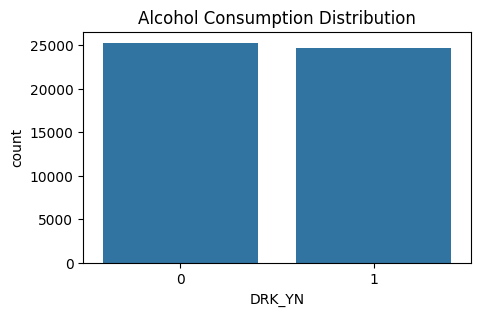

Numerical Columns:  ['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']


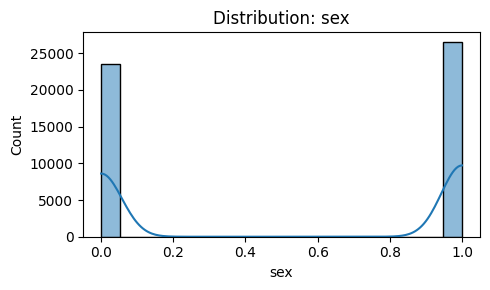

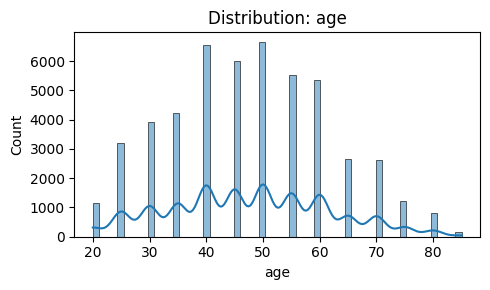

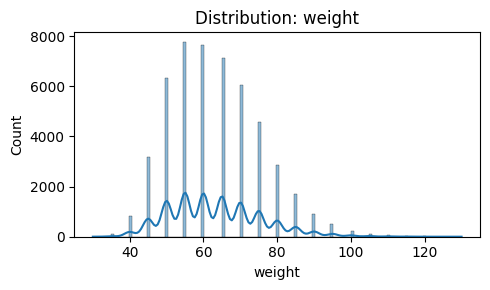

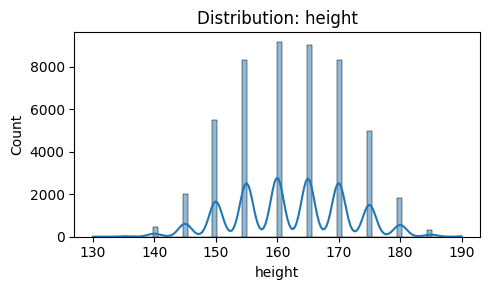

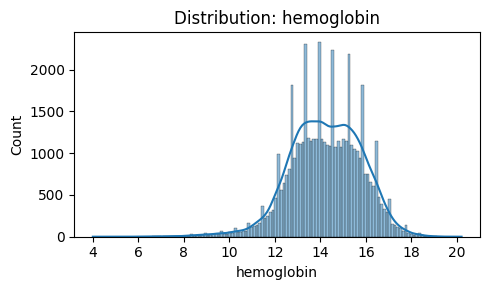

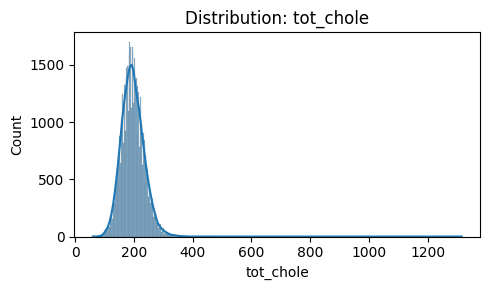

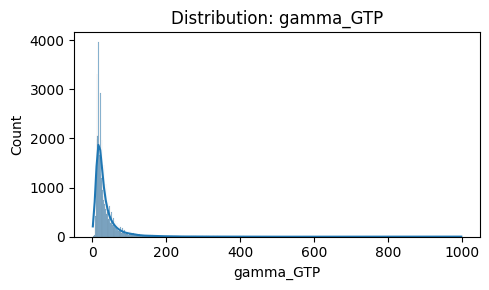

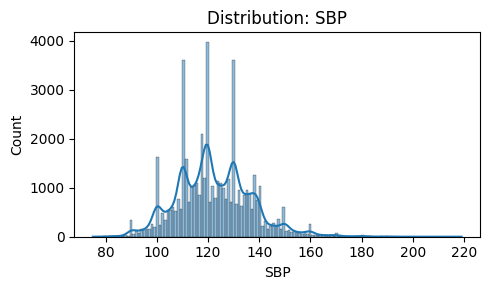

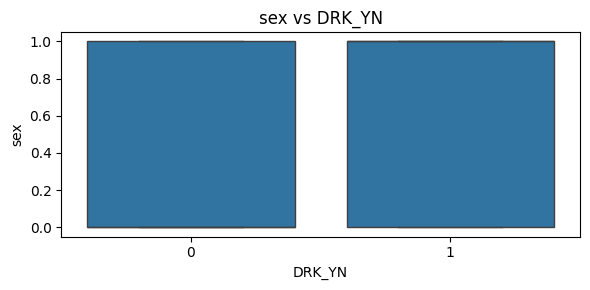

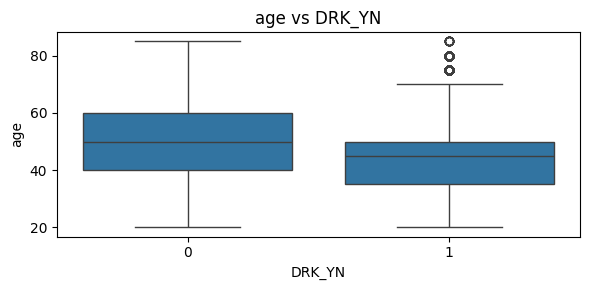

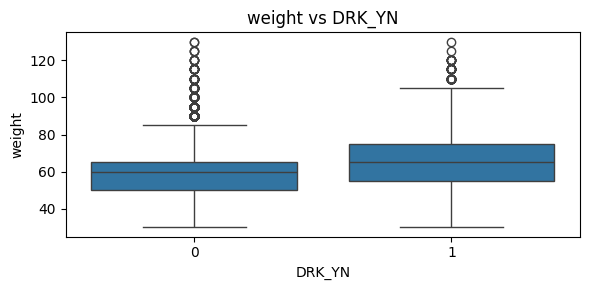

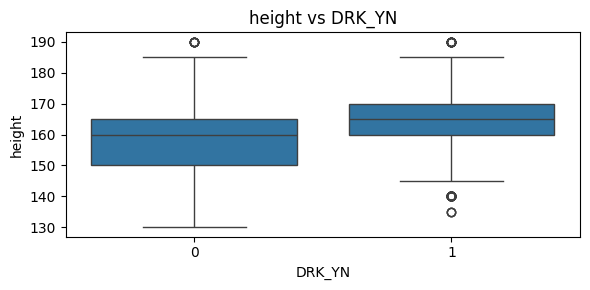

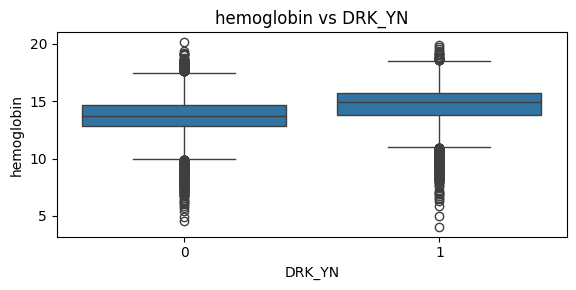

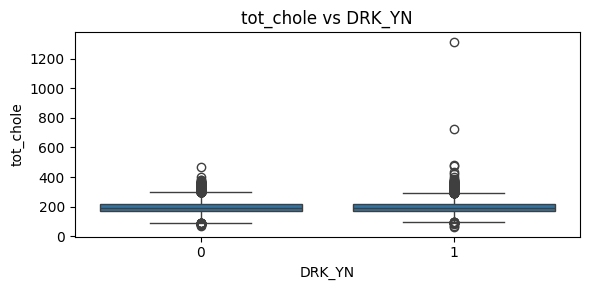

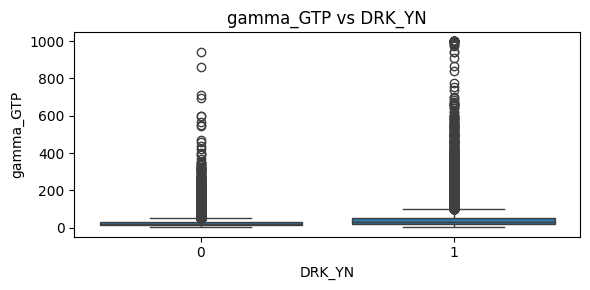

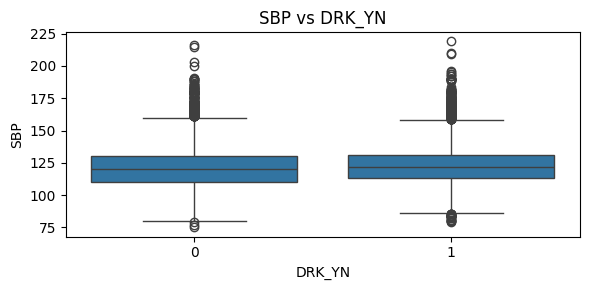

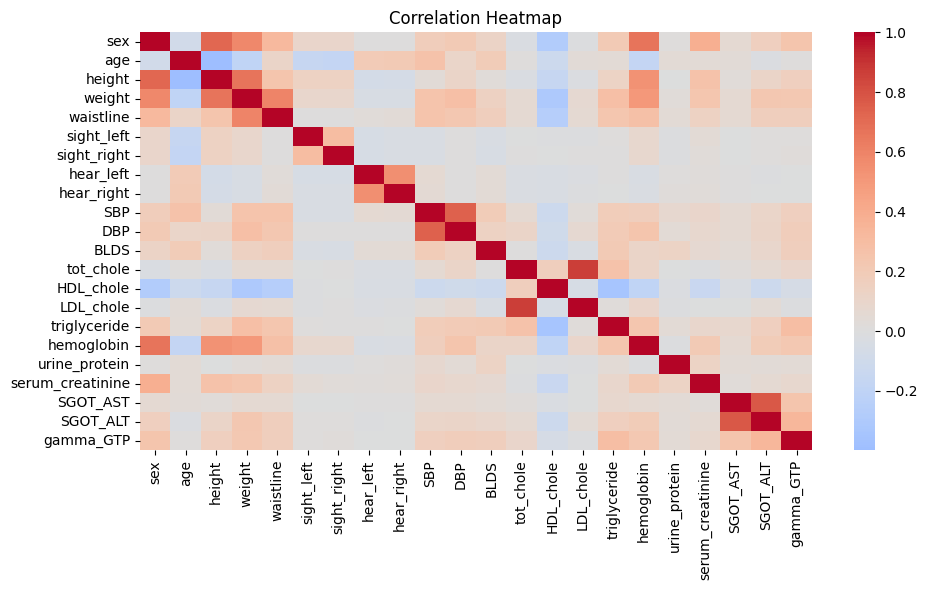

In [13]:
#Target Column Data Distribution
plt.figure(figsize=(5,3))
sns.countplot(x='DRK_YN', data=df)
plt.title("Alcohol Consumption Distribution")
plt.show()

X = df.drop(columns=['DRK_YN', 'SMK_stat_type_cd'])
y = df['DRK_YN']

num_cols = X.select_dtypes(include=np.number).columns.tolist()

print("Numerical Columns: ", num_cols)

columns = ['sex', 'age', 'weight', 'height', 'hemoglobin', 'tot_chole', 'gamma_GTP', 'SBP']

#Numeric distribution for first eight columns
for col in columns:
  plt.figure(figsize=(5,3))
  sns.histplot(df[col], kde=True)
  plt.title(f"Distribution: {col}")
  plt.tight_layout()
  plt.show()

#Box plot for numeric columns vs target column
for col in columns:
  plt.figure(figsize=(6,3))
  sns.boxplot(x=df["DRK_YN"], y=df[col])
  plt.title(f"{col} vs DRK_YN")
  plt.tight_layout()
  plt.show()

#Correlation heatmap for numeric columns
if len(num_cols) > 1:
  corr = df[num_cols].corr(numeric_only=True)
  plt.figure(figsize=(10,6))
  sns.heatmap(corr, cmap="coolwarm", center=0)
  plt.title("Correlation Heatmap")
  plt.tight_layout()
  plt.show()

Actual

In [14]:
#Feature | Target Split

X = df.drop(columns=['DRK_YN'])
y = df['DRK_YN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

numeric_pipe = Pipeline([
  ("imputer", SimpleImputer(strategy="median")),
  ("scaler", StandardScaler())
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols)
])

print("Train: ", X_train.shape, "\nTest : ", X_test.shape)

Train:  (35000, 23) 
Test :  (15000, 23)


Logistic Regression
Test F1:  0.7213
Test Accuracy:  0.7281
Test Precision:  0.7308
Test Recall:  0.712

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7589
           1       0.73      0.71      0.72      7411

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



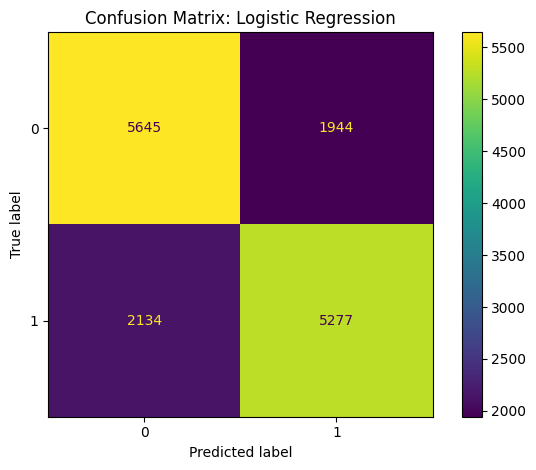

Random Forest
Test F1:  0.7284
Test Accuracy:  0.7308
Test Precision:  0.7261
Test Recall:  0.7308

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      7589
           1       0.73      0.73      0.73      7411

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



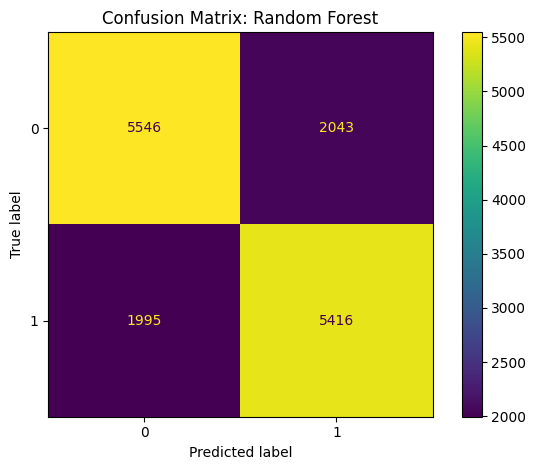

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.728133,0.730785,0.712050,0.721296
1,Random Forest,0.730800,0.726103,0.730806,0.728447


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

def evaluate_classification_model(name, model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  predict_test = model.predict(X_test)

  print(f"{name}")
  print("Test F1: ", round(f1_score(y_test, predict_test), 4))
  print("Test Accuracy: ", round(accuracy_score(y_test, predict_test), 4))
  print("Test Precision: ", round(precision_score(y_test, predict_test), 4))
  print("Test Recall: ", round(recall_score(y_test, predict_test), 4))

  print("\nClassification Report (Test):")
  print(classification_report(y_test, predict_test, zero_division=0))

  cm = confusion_matrix(y_test, predict_test)
  ConfusionMatrixDisplay(cm).plot(values_format="d")
  plt.title(f"Confusion Matrix: {name}")
  plt.tight_layout()
  plt.show()

  return{
      "Model": name,
      "Accuracy": accuracy_score(y_test, predict_test),
      "Precision": precision_score(y_test, predict_test, zero_division=0),
      "Recall": recall_score(y_test, predict_test, zero_division=0),
      "F1": f1_score(y_test, predict_test, zero_division=0),
  }

log_reg = Pipeline([
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000, solver="saga", n_jobs=-1))
])

rf = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(random_state=42, n_estimators=200, n_jobs=-1, max_depth=20, max_features="sqrt", min_samples_leaf=2))
])

results = []
results.append(evaluate_classification_model("Logistic Regression", log_reg, X_train, y_train, X_test, y_test))
results.append(evaluate_classification_model("Random Forest", rf, X_train, y_train, X_test, y_test))

pd.DataFrame(results)


In [16]:
#Hyper Parameter Tuning
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_dist = {
    "model__C": [0.01, 0.1, 1, 10, 20, 50]
}

logreg_rs = RandomizedSearchCV(
    log_reg,
    logreg_dist,
    n_iter=5,
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    refit=True,
    verbose=1
)

logreg_rs.fit(X_train, y_train)
print("Best Logistic Regression Parameters:", logreg_rs.best_params_)
print("Best Logistic Regression CV F1 Score:", logreg_rs.best_score_)

X_small, _, y_small, _ = train_test_split(
    X_train, y_train,
    train_size=0.7,
    stratify=y_train,
    random_state=42
)

rf_dist = {
    "model__n_estimators": [150, 250],
    "model__max_depth": [10, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt", 0.5]
}

rf_rs = RandomizedSearchCV(
    rf,
    rf_dist,
    n_iter=10,
    scoring="f1",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_rs.fit(X_small, y_small)
print("Best Random Forest parameters:", rf_rs.best_params_)
print("Best Random Forest CV F1:", rf_rs.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Logistic Regression Parameters: {'model__C': 0.01}
Best Logistic Regression CV F1 Score: 0.7192080358866881
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest parameters: {'model__n_estimators': 250, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_features': 0.5, 'model__max_depth': 10}
Best Random Forest CV F1: 0.7289634359258577


LogReg tuned + FS(K=20)
Test F1:  0.7206
Test Accuracy:  0.7273
Test Precision:  0.7298
Test Recall:  0.7115

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      7589
           1       0.73      0.71      0.72      7411

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



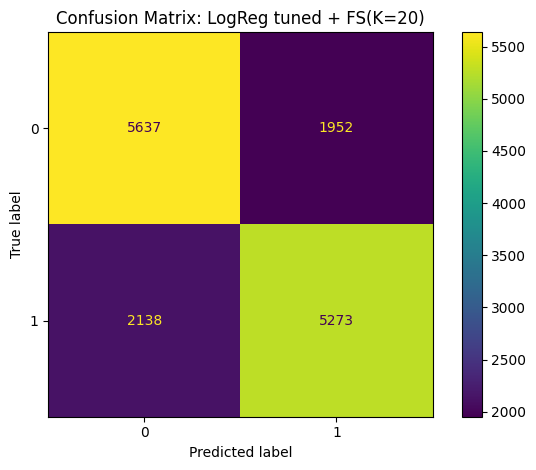

RF tuned + FS(K=20)
Test F1:  0.7258
Test Accuracy:  0.7269
Test Precision:  0.7201
Test Recall:  0.7315

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      7589
           1       0.72      0.73      0.73      7411

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000



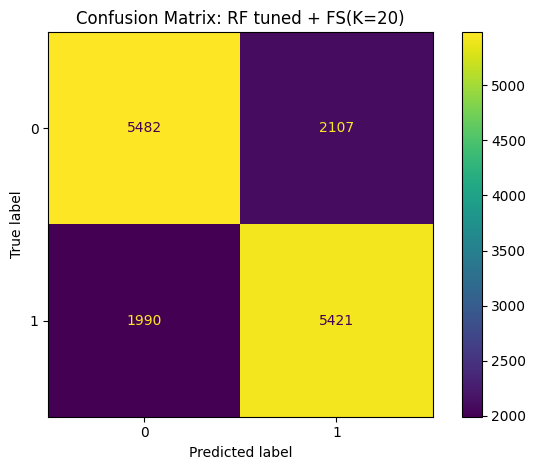

,Model,Accuracy,Precision,Recall,F1
0,LogReg tuned + FS(K=20),0.727333,0.729827,0.71151,0.720552
1,RF tuned + FS(K=20),0.726867,0.720112,0.73148,0.725751


In [17]:
#Feature Selection (SelectKBest method)

from sklearn.feature_selection import SelectKBest, mutual_info_classif

K = 20

logreg_final = Pipeline([
    ("preprocess", preprocess),
    ("feature_selection", SelectKBest(mutual_info_classif, k=K)),
    ("model", LogisticRegression(
        max_iter=2000,
        C=logreg_rs.best_params_["model__C"],
        solver="saga",
        penalty="l2"
    ))
])

rf_final = Pipeline([
    ("preprocess", preprocess),
    ("feature_selection", SelectKBest(mutual_info_classif, k=K)),
    ("model", RandomForestClassifier(
        random_state=42,
        n_estimators=rf_rs.best_params_["model__n_estimators"],
        max_depth=rf_rs.best_params_["model__max_depth"],
        min_samples_split=rf_rs.best_params_["model__min_samples_split"],
        min_samples_leaf=rf_rs.best_params_["model__min_samples_leaf"],
    ))
])

final_results = []

final_results.append(evaluate_classification_model(f"LogReg tuned + FS(K={K})", logreg_final, X_train, y_train, X_test, y_test))
final_results.append(evaluate_classification_model(f"RF tuned + FS(K={K})", rf_final, X_train, y_train, X_test, y_test))

final_df = pd.DataFrame(final_results)
final_df

In [18]:
#Final Models and Comparative Tables
final_table = pd.DataFrame([
    {
        "Model": "LogReg (tuned) + SelectKBest",
        "Features": f"Selected ({K})",
        "CV Score (f1_macro)": logreg_rs.best_score_,
        **results[0]
    },
    {
        "Model": "RandomForest (tuned) + SelectKBest",
        "Features": f"Selected ({K})",
        "CV Score (f1_macro)": rf_rs.best_score_,
        **results[1]
    }
])

final_table = final_table.loc[:, ~final_table.columns.duplicated()]
final_table


,Model,Features,CV Score (f1_macro),Accuracy,Precision,Recall,F1
0,Logistic Regression,Selected (20),0.719208,0.728133,0.730785,0.712050,0.721296
1,Random Forest,Selected (20),0.728963,0.730800,0.726103,0.730806,0.728447


Neural Network (MLPClassifier)
Test F1:  0.7327
Test Accuracy:  0.7355
Test Precision:  0.7316
Test Recall:  0.7338

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7589
           1       0.73      0.73      0.73      7411

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



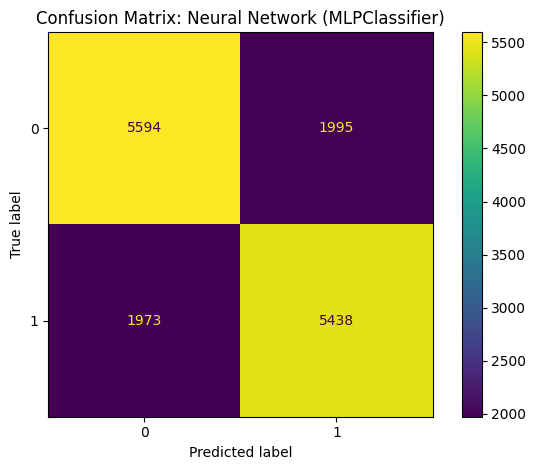

,Model,Accuracy,Precision,Recall,F1
0,Neural Network (MLPClassifier),0.735467,0.731602,0.733774,0.732687


In [19]:
#Neural Network (MLP Classifier)
mlp = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        alpha=1e-4,
        learning_rate_init=1e-3,
        max_iter=500,
        random_state=42,
        early_stopping=True
    ))
])

mlp_result = evaluate_classification_model("Neural Network (MLPClassifier)", mlp, X_train, y_train, X_test, y_test)
pd.DataFrame([mlp_result])


8) Short Reflection Template (paste into report)

“Conclusion and Reflection” section:

Model Performance: Compare Accuracy, Precision/Recall/F1 (macro) across models; mention if data is imbalanced and why macro-F1 is appropriate.

Impact of Methods: Explain whether tuning improved CV score and whether feature selection helped or hurt (sometimes it improves generalization; sometimes it removes useful signals).

Future Work: Try more features/engineering, different k, class weights, different ensemble models (XGBoost if allowed), or deeper MLP tuning.

Test

In [20]:
# df_work = df.copy()

# # Optional BMI
# if {"height", "weight"}.issubset(df_work.columns):
#     h_m = df_work["height"] / 100
#     df_work["bmi"] = df_work["weight"] / (h_m ** 2)

# # 1) Normalize target text safely (handles Yes/No, Y/N, 1/0, etc.)
# target = df_work["DRK_YN"]

# # Convert to string only where not null, strip spaces, lowercase
# target_clean = target.astype("string").str.strip().str.lower()

# # 2) Map multiple possible encodings to 0/1
# mapping = {
#     "no": 0, "n": 0, "0": 0, "false": 0,
#     "yes": 1, "y": 1, "1": 1, "true": 1
# }

# y = target_clean.map(mapping)

# # 3) Drop rows where target couldn't be mapped (these are causing NaN)
# valid_mask = y.notna()
# df_work = df_work.loc[valid_mask].copy()
# y = y.loc[valid_mask].astype(int)

# # 4) Now split features/target
# X = df_work.drop(columns=["DRK_YN"])

# print("After cleaning:")
# print("X shape:", X.shape)
# print("y missing?:", y.isna().any())
# print("y counts:\n", y.value_counts())


In [21]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.3,
#     random_state=42,
#     stratify=y
# )
# print("Train:", X_train.shape, "Test:", X_test.shape)


In [22]:
# num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# cat_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

# print("Numeric cols:", len(num_cols))
# print("Categorical cols:", cat_cols)

# numeric_pipe = Pipeline([
#     ("imputer", SimpleImputer(strategy="median")),
#     ("scaler", StandardScaler())
# ])

# categorical_pipe = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore"))
# ])

# preprocess = ColumnTransformer(
#     transformers=[
#         ("num", numeric_pipe, num_cols),
#         ("cat", categorical_pipe, cat_cols)
#     ],
#     remainder="drop"
# )


In [23]:
# def evaluate_classification_model(name, model, X_train, y_train, X_test, y_test):
#     model.fit(X_train, y_train)
#     pred_test = model.predict(X_test)

#     acc = accuracy_score(y_test, pred_test)
#     prec = precision_score(y_test, pred_test, zero_division=0)
#     rec = recall_score(y_test, pred_test, zero_division=0)
#     f1 = f1_score(y_test, pred_test, zero_division=0)

#     print(f"\n===== {name} =====")
#     print("Test Accuracy :", round(acc, 4))
#     print("Test Precision:", round(prec, 4))
#     print("Test Recall   :", round(rec, 4))
#     print("Test F1       :", round(f1, 4))
#     print("\nClassification Report (Test):")
#     print(classification_report(y_test, pred_test, zero_division=0))

#     cm = confusion_matrix(y_test, pred_test)
#     ConfusionMatrixDisplay(cm).plot(values_format="d")
#     plt.title(f"Confusion Matrix: {name}")
#     plt.tight_layout()
#     plt.show()

#     return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}


In [24]:
# from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# log_reg = Pipeline([
#     ("preprocess", preprocess),
#     ("model", LogisticRegression(max_iter=3000, solver="saga", n_jobs=-1))
# ])

# rf = Pipeline([
#     ("preprocess", preprocess),
#     ("model", RandomForestClassifier(
#         random_state=42,
#         n_estimators=300,
#         max_depth=None,
#         n_jobs=-1
#     ))
# ])

# mlp = Pipeline([
#     ("preprocess", preprocess),
#     ("model", MLPClassifier(
#         hidden_layer_sizes=(64, 32),
#         activation="relu",
#         solver="adam",
#         alpha=1e-4,
#         learning_rate_init=1e-3,
#         max_iter=500,
#         early_stopping=True,
#         random_state=42
#     ))
# ])

# hgb = Pipeline([
#     ("preprocess", preprocess),
#     ("model", HistGradientBoostingClassifier(
#         learning_rate=0.05,
#         max_depth=6,
#         max_iter=400,
#         random_state=42
#     ))
# ])

# baseline_results = []
# baseline_results.append(evaluate_classification_model("Logistic Regression (baseline)", log_reg, X_train, y_train, X_test, y_test))
# baseline_results.append(evaluate_classification_model("Random Forest (baseline)", rf, X_train, y_train, X_test, y_test))
# baseline_results.append(evaluate_classification_model("MLP (baseline)", mlp, X_train, y_train, X_test, y_test))
# baseline_results.append(evaluate_classification_model("HistGradientBoosting (baseline)", hgb, X_train, y_train, X_test, y_test))

# pd.DataFrame(baseline_results)


In [25]:
# from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Tune sample
# TUNE_N = 100000
# if len(X_train) > TUNE_N:
#     X_tune, _, y_tune, _ = train_test_split(
#         X_train, y_train, train_size=TUNE_N, stratify=y_train, random_state=42
#     )
# else:
#     X_tune, y_tune = X_train, y_train

# print("Tune data:", X_tune.shape)

# # Logistic Regression tuning
# logreg_grid = {
#     "model__C": [0.01, 0.1, 1, 10, 50]
# }
# logreg_gs = GridSearchCV(
#     log_reg, logreg_grid, scoring="f1", cv=cv, n_jobs=-1, refit=True
# )
# logreg_gs.fit(X_tune, y_tune)
# print("Best LogReg params:", logreg_gs.best_params_)
# print("Best LogReg CV F1:", logreg_gs.best_score_)

# # Random Forest tuning (small randomized)
# rf_dist = {
#     "model__n_estimators": [200, 400, 600],
#     "model__max_depth": [None, 10, 20, 30],
#     "model__min_samples_split": [2, 5, 10],
#     "model__min_samples_leaf": [1, 2, 4],
#     "model__max_features": ["sqrt", 0.5]
# }
# rf_rs = RandomizedSearchCV(
#     rf, rf_dist, n_iter=15, scoring="f1", cv=cv, random_state=42,
#     n_jobs=-1, refit=True, verbose=1
# )
# rf_rs.fit(X_tune, y_tune)
# print("Best RF params:", rf_rs.best_params_)
# print("Best RF CV F1:", rf_rs.best_score_)

# # HistGradientBoosting tuning (often best model)
# hgb_dist = {
#     "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
#     "model__max_depth": [3, 5, 7, 9],
#     "model__max_iter": [200, 400, 600],
#     "model__min_samples_leaf": [10, 20, 40, 60]
# }
# hgb_rs = RandomizedSearchCV(
#     hgb, hgb_dist, n_iter=20, scoring="f1", cv=cv,
#     random_state=42, n_jobs=-1, refit=True, verbose=1
# )
# hgb_rs.fit(X_tune, y_tune)
# print("Best HGB params:", hgb_rs.best_params_)
# print("Best HGB CV F1:", hgb_rs.best_score_)


In [26]:
# logreg_l1 = Pipeline([
#     ("preprocess", preprocess),
#     ("model", LogisticRegression(
#         penalty="l1",
#         solver="saga",
#         C=0.5,
#         max_iter=4000
#     ))
# ])

# l1_result = evaluate_classification_model("LogReg L1 (embedded FS)", logreg_l1, X_train, y_train, X_test, y_test)
# pd.DataFrame([l1_result])
